In [1]:
import glob
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import gensim


sns.set()

file_list = glob.glob(os.path.join(os.getcwd(), "/Users/felipesick/Desktop/main/IR_final_tx", "*.txt"))

corpus = []
files = []

for file_path in file_list:
    with open(file_path, encoding="latin-1") as f_input:
        corpus.append(f_input.read())
        files.append(''.join([n for n in os.path.basename(file_path)]))

df = pd.DataFrame({'file':files, 'text':corpus})

In [2]:
df.head()

,file,text
0,130589-20In-27162512U2099871120L-Gl-1.txt,ÿþU N I V E R S A L \n R E G I S T R A T I O N...
1,162154-22In-44268042C8433629540H-Gl.txt,ÿþ                        A N N U A L   R E P ...
2,128726-20In-29993158S40089266906X-Gl.txt,ÿþ    \n     \n     \n     \n     \n     \n   ...
3,142656-21In-36377280F35035600320W-Gl.txt,ÿþ      A   Y E A R   I N   R E V I E W \n 2 0...
4,110012-18nn-25522784O9388974140P-Eu.txt,ÿþ                    A n n u a l   f i n a n ...


In [3]:
df2 = pd.read_excel (r'/Users/felipesick/Desktop/Mallet_implementation/Dataset_all.xlsx')
df2.head()

,CR Company No,CR Report No,Company Name,Country of HQ,ISIN,Symbol,Exchange,Industry,ICB Supersector Name,ICB Sector Name,...,Region,GRI,GRI Adherence,IIRC,IIRC Adherence,External Assurance,Name of Assuror,file,Text File Included,Language
0,8,162751,AB Volvo,Sweden,SE0000115446,VOLV,NASDAQ,Industrials,Industrial Goods & Services,Industrial Engineering,...,Global,True,GRI Standards – Core,False,NaN,True,Deloitte AB,162751-22In-33363955W3832786050X-Gl.txt,True,English
1,14801,163197,Abertis Infraestructuras SA,Spain,ES0111845014,ABE,MCE,Industrials,Industrial Goods & Services,Industrial Transportation,...,Global,True,GRI Standards – Comprehensive,False,NaN,True,KPMG Asesores SL,163197-22In-43899993M1235727684U-Gl.txt,True,English
2,3028,164749,ABN Amro Bank NV,The Netherlands,NL0000301109,AABA,AMS,Financials,Banks,Banks,...,Global,False,NaN,True,Level 2,True,Ernst & Young (The Netherlands),164749-22In-38386517X78496308540V-Gl.txt,True,English
3,16672,163286,Acerinox SA,Spain,ES0132105018,ACX,MCE,Basic Materials,Basic Resources,Industrial Metals,...,Global,True,GRI Standards – Core,False,NaN,False,(None),163286-22In-36576064X21501500480V-Gl.txt,False,English
4,16102,163655,Adidas AG,Germany,DE0005003404,ADS,FRA,Consumer Goods,Personal & Household Goods,Personal Goods,...,Global,True,GRI Standards – Core (Web Index),False,NaN,True,KPMG Deutsche Treuhand-Gesellschaft AG Wirtsch...,163655-22In-46150710W24336807740X-Gl.txt,True,English


In [4]:
df3 = pd.merge(df, df2, on="file")

In [5]:
df3.head()

,file,text,CR Company No,CR Report No,Company Name,Country of HQ,ISIN,Symbol,Exchange,Industry,...,Period To,Region,GRI,GRI Adherence,IIRC,IIRC Adherence,External Assurance,Name of Assuror,Text File Included,Language
0,162154-22In-44268042C8433629540H-Gl.txt,ÿþ                        A N N U A L   R E P ...,17221,162154,SBM Offshore NV,The Netherlands,NL0000360618,SBMO,AMS,Oil & Gas,...,2021-12-31 00:00:00,Global,True,GRI Standards – Core,True,Level 2,True,PricewaterhouseCoopers Accountants NV,True,English
1,128726-20In-29993158S40089266906X-Gl.txt,ÿþ    \n     \n     \n     \n     \n     \n   ...,19259,128726,EDP Renováveis SA,Spain,ES0127797019,EDPR,ELI,Utilities,...,2019-12-31 00:00:00,Global,True,GRI Standards – Core,True,Level 2,True,PricewaterhouseCoopers Auditores SL,False,English
2,142656-21In-36377280F35035600320W-Gl.txt,ÿþ      A   Y E A R   I N   R E V I E W \n 2 0...,188,142656,F Hoffmann-La Roche Ltd,Switzerland,NaN,ROG,SIX,Health Care,...,2020-12-31 00:00:00,Global,True,GRI Standards – Core (Web Index),False,NaN,True,PricewaterhouseCoopers (Switzerland),True,English
3,110012-18nn-25522784O9388974140P-Eu.txt,ÿþ                    A n n u a l   f i n a n ...,32299,110012,Warehouses De Pauw Comm VA,Belgium,BE0003763779,WDP,EBR,Financials,...,2017-12-31 00:00:00,Europe,True,GRI Standards – Undeclared,False,NaN,True,Deloitte (Belgium),True,English
4,146538-21In-35315658E8981020944C-Gl.txt,ÿþ  S E C T I O N   H E A D I N G \n   2 0 2 0...,35629,146538,Betsson AB,Sweden,SE0014186532,BETS-B,STO,Consumer Services,...,2020-12-31 00:00:00,Global,True,GRI Standards – Core,False,NaN,True,PricewaterhouseCoopers AB (Sweden),True,English


In [6]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2248 entries, 0 to 2247
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   file                  2248 non-null   object
 1   text                  2248 non-null   object
 2   CR Company No         2248 non-null   int64 
 3   CR Report No          2248 non-null   int64 
 4   Company Name          2248 non-null   object
 5   Country of HQ         2248 non-null   object
 6   ISIN                  2104 non-null   object
 7   Symbol                2248 non-null   object
 8   Exchange              2248 non-null   object
 9   Industry              2248 non-null   object
 10  ICB Supersector Name  2248 non-null   object
 11  ICB Sector Name       2248 non-null   object
 12  ICB Subsector Name    2248 non-null   object
 13  Title                 2248 non-null   object
 14  type                  2248 non-null   object
 15  Report Type           2248 non-null   

In [7]:
import nltk 
nltk.download('stopwords')
#import pyLDAvis
#import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import spacy

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/felipesick/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
data = list(df3.text)

In [9]:
string =""
for x in data: 
    string += ""+x

In [10]:
import textstat

textstat.flesch_reading_ease(string)

In [11]:
textstat.flesch_reading_ease(string)

In [12]:
textstat.flesch_kincaid_grade(string)

In [13]:
textstat.gunning_fog(string)

In [14]:
#bigram = gensim.models.Phrases(data, min_count=20, threshold=100)
#trigram = gensim.models.Phrases(bigram[data], threshold=100)
#bigram_mod = gensim.models.phrases.Phraser(bigram)
#trigram_mod = gensim.models.phrases.Phraser(trigram)

In [15]:

# only need tagger, no need for parser and named entity recognizer, for faster implementation
nlp = spacy.load('en_core_web_md', disable=['parser', 'ner'])
nlp.max_length = 20000000 # or even higher
# get stopwords from nltk library
stop_words = nltk.corpus.stopwords.words('english')

def process_words(texts, stop_words=stop_words, allowed_tags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    
    """Convert a document into a list of lowercase tokens, build bigrams-trigrams, implement lemmatization"""
    
    # remove stopwords, short tokens and letter accents 
    texts = [[word for word in simple_preprocess(str(doc), deacc=True, min_len=3) if word not in stop_words] for doc in texts]
    
    # bi-gram and tri-gram implementation
    #texts = [bigram_mod[doc] for doc in texts]
    #texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
    
    texts_out = []
    
    # implement lemmatization and filter out unwanted part of speech tags
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_tags])
    
    # remove stopwords and short tokens again after lemmatization
    texts_out = [[word for word in simple_preprocess(str(doc), deacc=True, min_len=3) if word not in stop_words] for doc in texts_out]    
    
    return texts_out

/Users/felipesick/opt/anaconda3/lib/python3.9/site-packages/spacy/language.py:1895: UserWarning: [W123] Argument disable with value ['parser', 'ner'] is used instead of ['senter'] as specified in the config. Be aware that this might affect other components in your pipeline.
  warnings.warn(


In [16]:
data_ready = process_words(data)

In [17]:
id2word = corpora.Dictionary(data_ready)
print('Total Vocabulary Size:', len(id2word))

Total Vocabulary Size: 48810


In [18]:
len(string)

2756775627

In [19]:
corpus = [id2word.doc2bow(text) for text in data_ready]

In [20]:
dict_corpus = {}

for i in range(len(corpus)):
  for idx, freq in corpus[i]:
    if id2word[idx] in dict_corpus:
       dict_corpus[id2word[idx]] += freq
    else:
       dict_corpus[id2word[idx]] = freq
       
dict_df = pd.DataFrame.from_dict(dict_corpus, orient='index', columns=['freq'])

/Users/felipesick/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


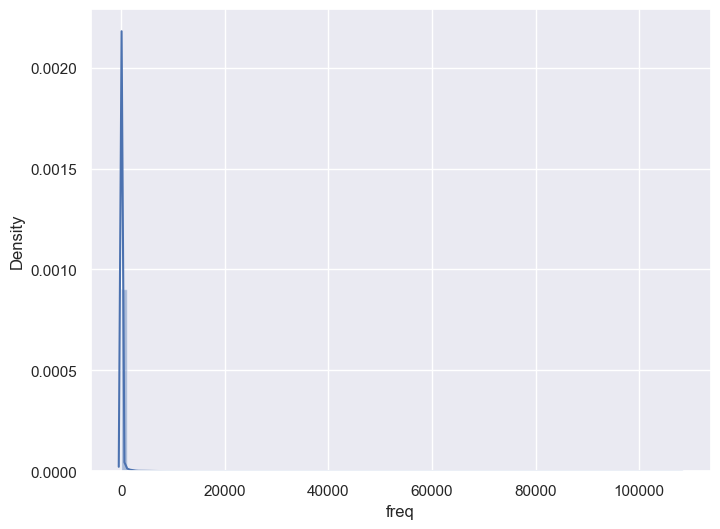

In [21]:
plt.figure(figsize=(8,6))
sns.distplot(dict_df['freq'], bins=100);


In [22]:
dict_df.sort_values('freq', ascending=False).head(10)

,freq
uyu,107863
financial,79931
report,66400
year,64745
risk,52632
share,51084
group,50929
company,50773
value,46752
board,44263


In [23]:
extension = dict_df[dict_df.freq>40000].index.tolist()

In [24]:
ids=[id2word.token2id[extension[i]] for i in range(len(extension))]
id2word.filter_tokens(bad_ids=ids)

In [25]:
# add high frequency words to stop words list
stop_words.extend(extension)
#stop_words.extend('a2a', 'aarhuskarlshamn', 'ab', 'abengoa', 'abertis', 'abn')
#stop_words.extend('a2a', 'aarhuskarlshamn', 'ab', 'abengoa', 'abertis', 'abn', 'academedia', 'acciona', 'accor', 'acerinox', 'actividades', 'addtech', 'adidas', 'aegon', 'aena', 'aéroports', 'åf', 'åf', 'agfa-gevaert', 'agrana', 'ahlers', 'ahlstrom-munksjö', 'air', 'akzo', 'alma', 'alstom', 'altana', 'alten', 'amadeus', 'ambea', 'amg', 'amsterdam', 'anheuser-busch', 'apetit', 'apoteksgruppen', 'arcadis', 'arcelormittal', 'arkema', 'as', 'ascopiave', 'asm', 'asml', 'asr', 'assicurazioni', 'assystem', 'atlas', 'atos', 'audi', 'austria', 'autoroutes', 'avanza', 'axa', 'axfood', 'azimut', 'ballast', 'banca', 'banca', 'banco', 'banco', 'banco', 'banco', 'banco', 'banco', 'bankia', 'bankinter', 'barco', 'basf', 'bayer', 'beijer', 'bel', 'belgacom', 'benetton', 'betsson', 'billerudkorsnäs', 'bittium', 'bmw', 'bnp', 'boliden', 'bolsas', 'bonava', 'bonduelle', 'bongrain', 'boozt', 'bouygues', 'bpost', 'brait', 'brisa', 'bulten', 'bureau', 'caixabank', 'capgemini', 'capio', 'cargotec', 'carrefour', 'casino', 'castellum', 'catena', 'caverion', 'cellnex', 'cepsa', 'cerved', 'cgg', 'christian', 'cie', 'cimpor', 'citycon', 'clas', 'cloetta', 'cnp', 'coima', 'com', 'compagnie', 'compagnie', 'compañia', 'concentric', 'constructions', 'conwert', 'coor', 'copenhagen', 'covestro', 'covivio', 'cramo', 'crédit', 'criteria', 'danone', 'dassault', 'deceuninck', 'delivery', 'longhi', 'deutsche', 'deutsche', 'ieteren', 'diös', 'distribuidora', 'dna', 'dustin', 'dws', 'eastnine', 'edenred', 'edf', 'edp', 'edreams', 'eiffage', 'elecnor', 'electricité', 'electrolux', 'elia', 'elisa', 'enagás', 'energias', 'engie', 'eni', 'epiroc', 'eqt', 'eramet', 'erste', 'essilor', 'essity', 'etteplan', 'euler', 'eurazeo', 'eurobank', 'eurocash', 'eutelsat', 'evli', 'fabasoft', 'fabege', 'fagron', 'faurecia', 'ferratum', 'ferrovial', 'fingerprint', 'first', 'fiskars', 'fleury', 'fng', 'fomento', 'forfarmers', 'fortum', 'fresenius', 'fugro', 'galp', 'gas', 'gdf', 'gea', 'gecina', 'gedeon', 'gefran', 'gerresheimer', 'getinge', 'getlink', 'global', 'globaltrans', 'grandvision', 'gränges', 'grifols', 'groupe', 'groupe', 'groupe', 'groupe', 'grupa', 'grupa', 'grupo', 'gruppo', 'halcor', 'hamburger', 'havas', 'heineken', 'hellenic', 'hellenic', 'hensoldt', 'hibernia', 'hkscan', 'hms', 'hochtief', 'hoist', 'holland', 'holmen', 'homechoice', 'huhtamäki', 'husqvarna', 'iberdrola', 'iberia', 'ica', 'icade', 'iliad', 'imerys', 'immofinanz', 'ina-industrija', 'indra', 'industria', 'industrivärden', 'infineon', 'infrastrutture', 'ing', 'ingenico', 'inmobiliaria', 'intrum', 'investor', 'ipsen', 'italcementi', 'italmobiliare', 'james', 'jcdecaux', 'jde', 'jeronimo', 'jm', 'k+s', 'kappahl', 'kbc', 'kemira', 'kendrion', 'kering', 'kesko', 'kghm', 'kinnevik', 'klépierre', 'kojamo', 'koninklijke', 'koninklijke', 'koninklijke', 'koninklijke', 'koninklijke', 'korian', 'krka', 'kws', 'lanxess', 'legrand', 'lenzing', 'leonardo', 'leoni', 'loomis', 'oréal', 'lotus', 'lpp', 'luxottica', 'mapfre', 'mayr-melnhof', 'mbank', 'mediaset', 'mekonomen', 'meliá', 'mercialys', 'métropole', 'michelin', 'modern', 'mondi', 'mvv', 'mycronic', 'naturgy', 'neopost', 'neste', 'netent', 'nexa', 'nexans', 'nexans', 'nexity', 'nibe', 'nn', 'nobina', 'nord', 'nordic', 'nordic', 'nos', 'novo', 'novozymes', 'nutreco', 'obrascón', 'oci', 'ontex', 'opap', 'orange', 'ordina', 'outokumpu', 'ovs', 'palfinger', 'pandox', 'pelion', 'pernod', 'pharmagest', 'pirelli', 'podravka', 'polski', 'porsche', 'pöyry', 'proffice', 'promotora', 'prosieben', 'prosus', 'proximus', 'publicis', 'puma', 'randstad', 'ratos', 'realia', 'recipharm', 'red', 'rémy', 'renault', 'repsol', 'resurs', 'rhi', 'rhi', 'royal', 'royal', 'rvrc', 'saab', 'sacyr', 'sacyr', 'saeta', 'safran', 'salini', 'salvatore', 'samhällsbyggnadsbolaget', 'sandvik', 'sanofi', 'sanoma', 'sap', 'sartorius', 'sas', 'savencia', 'sbm', 'scandic', 'scania', 'schneider', 'sdiptech', 'seb', 'séché', 'sectra', 'siaulių', 'siemens', 'signify', 'sipef', 'skandinaviska', 'skanska', 'skf', 'skistar', 'sns', 'société', 'société', 'société', 'société', 'sodexo', 'soitec', 'solarworld', 'solvay', 'ssab', 'stendörren', 'stern', 'stora', 'strabag', 'südzucker', 'suez', 'suominen', 'svenska', 'svenska', 'swedbank', 'swedish', 'swedol', 'symrise', 'systemair', 'talvivaara', 'tarkett', 'tdc', 'technicolor', 'técnicas', 'tele2', 'telefonaktiebolaget', 'telefónica', 'telekom', 'telenet', 'teleperformance', 'telia', 'terna', 'tesmec', 'tf1', 'thales', 'thule', 'thyssenkrupp', 'tieto', 'tiszai', 'titan', 'tkh', 'tnt', 'tobii', 'tod', 'total', 'ucb', 'umicore', 'unibail-rodamco', 'unibail-rodamco-westfield', 'unicaja', 'unicredit', 'unipol', 'unipol', 'upm-kymmene', 'uponor', 'vaisala', 'valeo', 'valmet', 'van', 'van', 'veolia', 'veon', 'verbund', 'vestas', 'vidrala', 'vinci', 'virbac', 'viscofan', 'vivendi', 'wallenstam', 'warehouses', 'wärtsilä', 'webuild', 'wereldhave', 'wolters', 'worldline', 'yit', 'yoox', 'zalando', 'zodiac', 'autoliv', 'avantium', 'bawag', 'beter', 'freenet', 'koninklijke', 'metsä', 'nordea', 'nv', 'ox2', 'securitas', 'sonae', 'srv', 'terveystalo', 'wienerberger', 'adva', 'aib', 'aixtron', 'almawave', 'amplifon', 'amrest', 'antibiotice', 'assa', 'bank', 'bank', 'be', 'bechtle', 'beiersdorf', 'berentzen-gruppe', 'cementir', 'constellium', 'crh', 'cyfrowy', 'davide', 'deutsche', 'dmg', 'drägerwerk', 'dsv', 'e.on', 'endesa', 'enento', 'evonik', 'eydap', 'fraport', 'gn', 'grand', 'greencore', 'grupa', 'h&m', 'haypp', 'henkel', 'immobiliare', 'iss', 'kerry', 'komercni', 'le', 'leg', 'lundin', 'mercedes-benz', 'mlp', 'national', 'neinor', 'neles', 'nemetschek', 'new', 'nh', 'nkt', 'nordex', 'pandora', 'piaggio', 'prysmian', 'public', 'raiffeisen', 'rockwool', 'rovio', 'royal', 'saf-holland', 'semperit', 'shurgard', 'siemens', 'siltronic', 'solaria', 'stockmann', 'thrace', 'tietoevry', 'veoneer', 'vitesco', 'volkswagen', 'william', 'adecco', 'aker', 'aker', 'aker', 'aker', 'anglo', 'arbonia', 'astrazeneca', 'aviva', 'b2holding', 'bae', 'barclays', 'belimo', 'borregaard', 'bw', 'cable', 'catlin', 'cembra', 'cermaq', 'cicor', 'clariant', 'cls', 'coats', 'coca-cola', 'coca-cola', 'compass', 'costain', 'crest', 'dätwyler', 'diageo', 'dialog', 'dnb', 'dof', 'dufry', 'entra', 'f', 'g4s', 'geberit', 'givaudan', 'gjensidige', 'glaxosmithkline', 'grainger', 'grieg', 'hofseth', 'holcim', 'howden', 'imperial', 'imperial', 'inficon', 'inmarsat', 'international', 'intershop', 'intertek', 'johnson', 'jupiter', 'kongsberg', 'lafargeholcim', 'lerøy', 'liechtensteinische', 'lloyds', 'lonza', 'marel', 'marine', 'marks', 'meyer', 'mikron', 'mowi', 'nepi', 'nobel', 'norsk', 'norske', 'northumbrian', 'novartis', 'odfjell', 'ophir', 'orkla', 'pan', 'panalpina', 'pennon', 'petrofac', 'petropavlovsk', 'polymetal', 'premier', 'q-free', 'randgold', 'redrow', 'salmar', 'schibsted', 'schindler', 'schmolz', 'segro', 'sgs', 'shaftesbury', 'siegfried', 'sig', 'sika', 'sonova', 'sparebank', 'sparebank', 'sse', 'stolt-nielsen', 'storebrand', 'straumann', 'swiss', 'swiss', 'swiss', 'swisscom', 'swissquote', 'syngenta', 'telecity', 'telenor', 'temenos', 'tesco', 'the', 'the', 'the', 'the', 'the', 'tomra', 'ubs', 'unilever', 'unite', 'united', 'valiant', 'vetropack', 'virgin', 'wallenius', 'wilh.', 'wpp', 'yara', 'zehnder', 'zürich', '3i', 'abb', 'abcam', 'aberdeen', 'accsys', 'actelion', 'adevinta', 'aker', 'aker', 'allreal', 'also', 'amcor', 'amec', 'arm', 'aston', 'atea', 'atlantica', 'atlantica', 'augean', 'autoneum', 'banque', 'barry', 'bell', 'bg', 'biffa', 'big', 'bkw', 'bp', 'british', 'bt', 'bucher', 'cairn', 'carillion', 'centamin', 'central', 'ceva', 'cnh', 'compagnie', 'convatec', 'crédit', 'croda', 'delphi', 'derwent', 'dksh', 'dorma+kaba', 'ds', 'edag', 'elkem', 'emmi', 'endeavour', 'energean', 'equatorial', 'equinor', 'europris', 'ewos', 'farfetch', 'feintool', 'ferrexpo', 'fiat', 'galenica', 'gem', 'genel', 'glencore', 'global', 'gurit', 'hammerson', 'helios', 'helvetia', 'highland', 'hikma', 'hochschild', 'horizonte', 'hurricane', 'ig', 'ihs', 'implenia', 'intercontinental', 'intermediate', 'international', 'intu', 'investec', 'john', 'julius', 'kier', 'kingfisher', 'klappir', 'klaveness', 'kuehne', 'land', 'landis+gyr', 'legal', 'liberty', 'linde', 'logitech', 'london', 'lonmin', 'marshalls', 'mch', 'mettler-toledo', 'morgan', 'mp', 'mpc', 'national', 'natwest', 'nestlé', 'nomad', 'norwegian', 'nrc', 'oc', 'okea', 'olav', 'oriflame', 'orior', 'partners', 'pearson', 'petra', 'pexip', 'pgs', 'photocure', 'provident', 'rea', 'reckitt', 'relx', 'renewi', 'rexam', 'rotork', 'royal', 'sabmiller', 'scatec', 'senior', 'serco', 'serica', 'severn', 'sfs', 'shire', 'sky', 'smart', 'smiths', 'spirent', 'stmicroelectronics', 'swatch', 'syncona', 'synthomer', 'te', 'teekay', 'telecom', 'thomas', 'tirupati', 'transocean', 'tullow', 'vedanta', 'vifor', 'vodafone', 'vontobel', 'vp', 'whitbread', 'xxl', 'zur', 'sa', 'bank', 'construcción', 'paris', 'ab', 'ag', 'nv', 'corporation', 'group', 'metallurgical', 'sverige', 'vesi', 'spa', 'holding', 'dei', 'vizcaya', 'portugues', 'sabadell', 'santo', 'español', 'srl', 'mercados', 'auto-estradas', 'saint-gobain', 'alpes', 'de', 'invest', 'management', 'a/s', 'se', 'gmbh', 'nouvelles', 'france', 'operator', 'portugal', 'oyj', 'abp', 'construcciones', '&', 'sgps', 'sdg', 'plc', 'access', 'cogedim', 'lambert', 'sca', '3', 'credito', 'works', 'und', 'organisation', 'aéreas', 'dd', 'diseño', 'italiane', 'socimi', 'industries', 'miedź', 'delhaize', 'electronics', 'd', 'comunicación', 'international', 'lain', 'c', 'naftowy', 'informaciones', '1', 'norden', 'banken', 'la', 'mannheim', 'biovitrum', 'company', 'ericsson', 'kombinát', 'finanziario', 'velde', 'kempen', 'systems', 'pauw', 'networking', 'bnp', 'aktiengesellschaft', 'nord', 'properties', 'distribuzione', 'as', 'of', 'westminster', 'storage', 'y', 'hydrogen', 'asa', 'wind', 'limited', 'wireless', 'ltd', 'partners', 'roche', 'finance', 'spencer', 'technology', 'resources', 'transport', 'bickenbach', 'smninfrastructure'', 'lease', 'mining', 'holdings', 'lausnir', 'carriers', 'nagel', 'general', 'exchange', 'inc', 'ships', 'europe', 'shuttle', 'gruppen', 'volvo', 'infraestructuras', 'amro', 'sme', 'pöyry', 'beteiligungs', 'liquide', 'nobel', 'media', 'it', 'advanced', 'commodities', 'inbev', 'i', 'tallinna', 'nederland', 'generali', 'copco', 'metall', 'paris-rhin-rhôn', 'nedam', 'monte', 'bilbao', 'comercial', 'espírito', 'popular', 'santander', 'alma', 'paribas', 'veritas', 'guichard-perrachon', 'telecom', 'dior', 'automotive', 'ohlson', 'assurances', 'res', 'hem', 'des', 'logistica', 'industrielles', 'immobilien', 'service', 'airports', 'agricole', 'caixacorp', 'systèmes''telecommunicatinment', 'nordisk', 'huarte', 'greek', 'ricard', 'interactive', 'koncern', 'sat', 'groupe', 'business', 'eléctrica', 'cointreau', 'magnesita', 'bam', 'wessanen', 'vallehermoso', 'yield', 'impregilo', 'ferragamo', 'offshore', 'electric', 'environnement', 'bankas', 'enskilda', 'reaal', 'bic', 'générale', 'ldc', 'enso', 'oy', 'cellulosa', 'handelsbanken', 'orphan', 'reunidas', 'lm', 'austria', 'vegyi', 'cement', 'banco', 'gruppo', 'lanschot', 'kluwer', 'net-a-porter', 'aerospace', 'bed', 'vopak', 'bekaert', 'optical', 'abloy', 'bgz', 'millennium', 'semiconductor', 'polsat', 'campari-milano', 'mori', 'panalpina', 'store', 'city', 'żywiec', 'hennes', 'grande', 'banka', 'lundbergföretagen', 'homes', 'work', 'hotel', 'power', 'boskalis', 'self', 'energía', 'demant', 'clean', 'horizons', 'solutions', 'american', 'money', 'european', 'hbc', 'nicholson', 'hoffmann-la', 'forsikring', 'seafood', 'biocare', 'joinery', 'brands', 'personal', 'matthey', 'fund', 'landesbank', 'banking', 'hf', 'harvest', 'and', 'burger', 'rockcastle', 'hydro', 'skogindustrier', 'water', 'african', 'world', '+', 'combibloc', 'life', 'prime', 'reinsurance', 'british', 'go-ahead', 'royal', 'sage', 'vitec', 'utilities', 'wilhelmsen', 'insurance', 'asset', 'pharmaceuticals', 'bp', 'foster', 'martin', 'sustainable', 'cantonale', 'callebaut', 'food', 'waste', 'yellow', 'fmb', 'asia', 'logistics', 'industrial', 'financiere', 'suisse', 'london', 'smith', 'engineering', 'palm', 'chrysler', 'diamonds', 'ship', 'towers', 'minerals', 'markit', 'capital', 'game', 'wood', 'baer', 'grænar', 'combination', 'securities', 'global', 'stock', 'sindall', 'evans', 'container', 'grid', 'foods', 'air', 'oerlikon', 'thon', 'financial', 'benckiser', 'mail', 'solar', 'trent', 'metering', 'connectivity', 'petrojarl', 'plus', 'cook', 'graphite', 'pharma', 'rose')
stop_words.extend(['a2a', 'nokia', 'vodafone', 'datum', 'year', 'report', 'page', 'picanol', 'austrian', 'french', 'voestalpine', 'ternium', 'saipem', 'prosiebensat', 'verbio', 'adler', 'enel', 'rwe', 'snaitech', 'snai', 'aarhuskarlshamn', 'ab', 'abengoa', 'abertis', 'abn', 'academedia', 'acciona', 'accor', 'acerinox', 'actividades', 'addtech', 'adidas', 'aegon', 'aena', 'aéroports', 'åf', 'åf', 'agfa-gevaert', 'agrana', 'ahlers', 'ahlstrom-munksjö', 'air', 'akzo', 'alma', 'alstom', 'altana', 'alten', 'amadeus', 'ambea', 'amg', 'amsterdam', 'anheuser-busch', 'apetit', 'apoteksgruppen', 'arcadis', 'arcelormittal', 'arkema', 'as', 'ascopiave', 'asm', 'asml', 'asr', 'assicurazioni', 'assystem', 'atlas', 'atos', 'audi', 'austria', 'autoroutes', 'avanza', 'axa', 'axfood', 'azimut', 'ballast', 'banca', 'banca', 'banco', 'banco', 'banco', 'banco', 'banco', 'banco', 'bankia', 'bankinter', 'barco', 'basf', 'bayer', 'beijer', 'bel', 'belgacom', 'benetton', 'betsson', 'billerudkorsnäs', 'bittium', 'bmw', 'bnp', 'boliden', 'bolsas', 'bonava', 'bonduelle', 'bongrain', 'boozt', 'bouygues', 'bpost', 'brait', 'brisa', 'bulten', 'bureau', 'caixabank', 'capgemini', 'capio', 'cargotec', 'carrefour', 'casino', 'castellum', 'catena', 'caverion', 'cellnex', 'cepsa', 'cerved', 'cgg', 'christian', 'cie', 'cimpor', 'citycon', 'clas', 'cloetta', 'cnp', 'coima', 'com', 'compagnie', 'compagnie', 'compañia', 'concentric', 'constructions', 'conwert', 'coor', 'copenhagen', 'covestro', 'covivio', 'cramo', 'crédit', 'criteria', 'danone', 'dassault', 'deceuninck', 'delivery', 'longhi', 'deutsche', 'deutsche', 'ieteren', 'diös', 'distribuidora', 'dna', 'dustin', 'dws', 'eastnine', 'edenred', 'edf', 'edp', 'edreams', 'eiffage', 'elecnor', 'electricité', 'electrolux', 'elia', 'elisa', 'enagás', 'energias', 'engie', 'eni', 'epiroc', 'eqt', 'eramet', 'erste', 'essilor', 'essity', 'etteplan', 'euler', 'eurazeo', 'eurobank', 'eurocash', 'eutelsat', 'evli', 'fabasoft', 'fabege', 'fagron', 'faurecia', 'ferratum', 'ferrovial', 'fingerprint', 'first', 'fiskars', 'fleury', 'fng', 'fomento', 'forfarmers', 'fortum', 'fresenius', 'fugro', 'galp', 'gas', 'gdf', 'gea', 'gecina', 'gedeon', 'gefran', 'gerresheimer', 'getinge', 'getlink', 'global', 'globaltrans', 'grandvision', 'gränges', 'grifols', 'groupe', 'groupe', 'groupe', 'groupe', 'grupa', 'grupa', 'grupo', 'gruppo', 'halcor', 'hamburger', 'havas', 'heineken', 'hellenic', 'hellenic', 'hensoldt', 'hibernia', 'hkscan', 'hms', 'hochtief', 'hoist', 'holland', 'holmen', 'homechoice', 'huhtamäki', 'husqvarna', 'iberdrola', 'iberia', 'ica', 'icade', 'iliad', 'imerys', 'immofinanz', 'ina-industrija', 'indra', 'industria', 'industrivärden', 'infineon', 'infrastrutture', 'ing', 'ingenico', 'inmobiliaria', 'intrum', 'investor', 'ipsen', 'italcementi', 'italmobiliare', 'james', 'jcdecaux', 'jde', 'jeronimo', 'jm', 'k+s', 'kappahl', 'kbc', 'kemira', 'kendrion', 'kering', 'kesko', 'kghm', 'kinnevik', 'klépierre', 'kojamo', 'koninklijke', 'koninklijke', 'koninklijke', 'koninklijke', 'koninklijke', 'korian', 'krka', 'kws', 'lanxess', 'legrand', 'lenzing', 'leonardo', 'leoni', 'loomis', 'oréal', 'lotus', 'lpp', 'luxottica', 'mapfre', 'mayr-melnhof', 'mbank', 'mediaset', 'mekonomen', 'meliá', 'mercialys', 'métropole', 'michelin', 'modern', 'mondi', 'mvv', 'mycronic', 'naturgy', 'neopost', 'neste', 'netent', 'nexa', 'nexans', 'nexans', 'nexity', 'nibe', 'nn', 'nobina', 'nord', 'nordic', 'nordic', 'nos', 'novo', 'novozymes', 'nutreco', 'obrascón', 'oci', 'ontex', 'opap', 'orange', 'ordina', 'outokumpu', 'ovs', 'palfinger', 'pandox', 'pelion', 'pernod', 'pharmagest', 'pirelli', 'podravka', 'polski', 'porsche', 'pöyry', 'proffice', 'promotora', 'prosieben', 'prosus', 'proximus', 'publicis', 'puma', 'randstad', 'ratos', 'realia', 'recipharm', 'red', 'rémy', 'renault', 'repsol', 'resurs', 'rhi', 'rhi', 'royal', 'royal', 'rvrc', 'saab', 'sacyr', 'sacyr', 'saeta', 'safran', 'salini', 'salvatore', 'samhällsbyggnadsbolaget', 'sandvik', 'sanofi', 'sanoma', 'sap', 'sartorius', 'sas', 'savencia', 'sbm', 'scandic', 'scania', 'schneider', 'sdiptech', 'seb', 'séché', 'sectra', 'siaulių', 'siemens', 'signify', 'sipef', 'skandinaviska', 'skanska', 'skf', 'skistar', 'sns', 'société', 'société', 'société', 'société', 'sodexo', 'soitec', 'solarworld', 'solvay', 'ssab', 'stendörren', 'stern', 'stora', 'strabag', 'südzucker', 'suez', 'suominen', 'svenska', 'svenska', 'swedbank', 'swedish', 'swedol', 'symrise', 'systemair', 'talvivaara', 'tarkett', 'tdc', 'technicolor', 'técnicas', 'tele2', 'telefonaktiebolaget', 'telefónica', 'telekom', 'telenet', 'teleperformance', 'telia', 'terna', 'tesmec', 'tf1', 'thales', 'thule', 'thyssenkrupp', 'tieto', 'tiszai', 'titan', 'tkh', 'tnt', 'tobii', 'tod', 'total', 'ucb', 'umicore', 'unibail-rodamco', 'unibail-rodamco-westfield', 'unicaja', 'unicredit', 'unipol', 'unipol', 'upm-kymmene', 'uponor', 'vaisala', 'valeo', 'valmet', 'van', 'van', 'veolia', 'veon', 'verbund', 'vestas', 'vidrala', 'vinci', 'virbac', 'viscofan', 'vivendi', 'wallenstam', 'warehouses', 'wärtsilä', 'webuild', 'wereldhave', 'wolters', 'worldline', 'yit', 'yoox', 'zalando', 'zodiac', 'autoliv', 'avantium', 'bawag', 'beter', 'freenet', 'koninklijke', 'metsä', 'nordea', 'nv', 'ox2', 'securitas', 'sonae', 'srv', 'terveystalo', 'wienerberger', 'adva', 'aib', 'aixtron', 'almawave', 'amplifon', 'amrest', 'antibiotice', 'assa', 'bank', 'bank', 'be', 'bechtle', 'beiersdorf', 'berentzen-gruppe', 'cementir', 'constellium', 'crh', 'cyfrowy', 'davide', 'deutsche', 'dmg', 'drägerwerk', 'dsv', 'e.on', 'endesa', 'enento', 'evonik', 'eydap', 'fraport', 'gn', 'grand', 'greencore', 'grupa', 'h&m', 'haypp', 'henkel', 'immobiliare', 'iss', 'kerry', 'komercni', 'le', 'leg', 'lundin', 'mercedes-benz', 'mlp', 'national', 'neinor', 'neles', 'nemetschek', 'new', 'nh', 'nkt', 'nordex', 'pandora', 'piaggio', 'prysmian', 'public', 'raiffeisen', 'rockwool', 'rovio', 'royal', 'saf-holland', 'semperit', 'shurgard', 'siemens', 'siltronic', 'solaria', 'stockmann', 'thrace', 'tietoevry', 'veoneer', 'vitesco', 'volkswagen', 'william', 'adecco', 'aker', 'aker', 'aker', 'aker', 'anglo', 'arbonia', 'astrazeneca', 'aviva', 'b2holding', 'bae', 'barclays', 'belimo', 'borregaard', 'bw', 'cable', 'catlin', 'cembra', 'cermaq', 'cicor', 'clariant', 'cls', 'coats', 'coca-cola', 'coca-cola', 'compass', 'costain', 'crest', 'dätwyler', 'diageo', 'dialog', 'dnb', 'dof', 'dufry', 'entra', 'f', 'g4s', 'geberit', 'givaudan', 'gjensidige', 'glaxosmithkline', 'grainger', 'grieg', 'hofseth', 'holcim', 'howden', 'imperial', 'imperial', 'inficon', 'inmarsat', 'international', 'intershop', 'intertek', 'johnson', 'jupiter', 'kongsberg', 'lafargeholcim', 'lerøy', 'liechtensteinische', 'lloyds', 'lonza', 'marel', 'marine', 'marks', 'meyer', 'mikron', 'mowi', 'nepi', 'nobel', 'norsk', 'norske', 'northumbrian', 'novartis', 'odfjell', 'ophir', 'orkla', 'pan', 'panalpina', 'pennon', 'petrofac', 'petropavlovsk', 'polymetal', 'premier', 'q-free', 'randgold', 'redrow', 'salmar', 'schibsted', 'schindler', 'schmolz', 'segro', 'sgs', 'shaftesbury', 'siegfried', 'sig', 'sika', 'sonova', 'sparebank', 'sparebank', 'sse', 'stolt-nielsen', 'storebrand', 'straumann', 'swiss', 'swiss', 'swiss', 'swisscom', 'swissquote', 'syngenta', 'telecity', 'telenor', 'temenos', 'tesco', 'the', 'the', 'the', 'the', 'the', 'tomra', 'ubs', 'unilever', 'unite', 'united', 'valiant', 'vetropack', 'virgin', 'wallenius', 'wilh.', 'wpp', 'yara', 'zehnder', 'zürich', '3i', 'abb', 'abcam', 'aberdeen', 'accsys', 'actelion', 'adevinta', 'aker', 'aker', 'allreal', 'also', 'amcor', 'amec', 'arm', 'aston', 'atea', 'atlantica', 'atlantica', 'augean', 'autoneum', 'banque', 'barry', 'bell', 'bg', 'biffa', 'big', 'bkw', 'bp', 'british', 'bt', 'bucher', 'cairn', 'carillion', 'centamin', 'central', 'ceva', 'cnh', 'compagnie', 'convatec', 'crédit', 'croda', 'delphi', 'derwent', 'dksh', 'dorma+kaba', 'ds', 'edag', 'elkem', 'emmi', 'endeavour', 'energean', 'equatorial', 'equinor', 'europris', 'ewos', 'farfetch', 'feintool', 'ferrexpo', 'fiat', 'galenica', 'gem', 'genel', 'glencore', 'global', 'gurit', 'hammerson', 'helios', 'helvetia', 'highland', 'hikma', 'hochschild', 'horizonte', 'hurricane', 'ig', 'ihs', 'implenia', 'intercontinental', 'intermediate', 'international', 'intu', 'investec', 'john', 'julius', 'kier', 'kingfisher', 'klappir', 'klaveness', 'kuehne', 'land', 'landis+gyr', 'legal', 'liberty', 'linde', 'logitech', 'london', 'lonmin', 'marshalls', 'mch', 'mettler-toledo', 'morgan', 'mp', 'mpc', 'national', 'natwest', 'nestlé', 'nomad', 'norwegian', 'nrc', 'oc', 'okea', 'olav', 'oriflame', 'orior', 'partners', 'pearson', 'petra', 'pexip', 'pgs', 'photocure', 'provident', 'rea', 'reckitt', 'relx', 'renewi', 'rexam', 'rotork', 'royal', 'sabmiller', 'scatec', 'senior', 'serco', 'serica', 'severn', 'sfs', 'shire', 'sky', 'smart', 'smiths', 'spirent', 'stmicroelectronics', 'swatch', 'syncona', 'synthomer', 'te', 'teekay', 'telecom', 'thomas', 'tirupati', 'transocean', 'tullow', 'vedanta', 'vifor', 'vodafone', 'vontobel', 'vp', 'whitbread', 'xxl', 'zur', 'sa', 'bank', 'construcción', 'paris', 'ab', 'ag', 'nv', 'corporation', 'group', 'metallurgical', 'sverige', 'vesi', 'spa', 'holding', 'dei', 'vizcaya', 'portugues', 'sabadell', 'santo', 'español', 'srl', 'mercados', 'auto-estradas', 'saint-gobain', 'alpes', 'de', 'invest', 'management', 'a/s', 'se', 'gmbh', 'nouvelles', 'france', 'operator', 'portugal', 'oyj', 'abp', 'construcciones', '&', 'sgps', 'sdg', 'plc', 'access', 'cogedim', 'lambert', 'sca', '3', 'credito', 'works', 'und', 'organisation', 'aéreas', 'dd', 'diseño', 'italiane', 'socimi', 'industries', 'miedź', 'delhaize', 'electronics', 'd', 'comunicación', 'international', 'lain', 'c', 'naftowy', 'informaciones', '1', 'norden', 'banken', 'la', 'mannheim', 'biovitrum', 'company', 'ericsson', 'kombinát', 'finanziario', 'velde', 'kempen', 'systems', 'pauw', 'networking', 'bnp', 'aktiengesellschaft', 'nord', 'properties', 'distribuzione', 'as', 'of', 'westminster', 'storage', 'y', 'hydrogen', 'asa', 'wind', 'limited', 'wireless', 'ltd', 'partners', 'roche', 'finance', 'spencer', 'technology', 'resources', 'transport', 'bickenbach', 'smninfrastructure'])
# rerun the process_words function
data_ready = process_words(data)
# recreate Dictionary
id2word = corpora.Dictionary(data_ready)
print('Total Vocabulary Size:', len(id2word))

Total Vocabulary Size: 49425


In [26]:
# Don't understand 
# Filter out words that occur less than 10 documents, or more than
# 50% of the documents.
#id2word.filter_extremes(no_below=10, no_above=0.5)
#print('Total Vocabulary Size:', len(id2word))

In [27]:
# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_ready]

In [28]:
mallet_path = "/Users/felipesick/Desktop/Mallet_implementation/mallet-2.0.8/bin/mallet"

In [29]:
gensim.__version__

'3.8.3'

In [30]:
import sys
import gensim
#import pyLDAvis
#import pyLDAvis.gensim

from gensim import corpora
from gensim import models
from gensim.models import Word2Vec
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.wrappers import LdaMallet

print('Python Version: %s' % (sys.version))

Python Version: 3.9.13 | packaged by conda-forge | (main, May 27 2022, 17:01:00) 
[Clang 13.0.1 ]


In [ ]:
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=35, id2word=id2word)

Mallet LDA: 35 topics, 6 topic bits, 111111 topic mask
Data loaded.
max tokens: 92698
total tokens: 6173004
<10> LL/token: -10,55821
<20> LL/token: -9,16578
<30> LL/token: -8,84601
<40> LL/token: -8,73366

0	1,42857	euro service follow amount result income end activity contract network investment change current tax cost concession rate indicator relate project 
1	1,42857	director performance cost shareholder groupos executive business service committee profit change review bus award continue scheme pension account strategic contract 
2	1,42857	executive material plan benefit include member base performance information audit make policy work remuneration safety recognise process operation committee term 
3	1,42857	uyuwuyu uyuauyu uyuouyu uyuqu uyuquyu uyusu uyuau uyubuyu uyuou yupuyu yuwuyu uyuruyu yuouyu yuhuyu uyuiu yuyuyuwuyu uyuwu yuyuyu uyuªuyu uyusuyu 
4	1,42857	work people service supplier plan employee customer day make figure increase volume annual important impact business pro

In [ ]:
from pprint import pprint
# display topics
pprint(ldamallet.show_topics(formatted=False))

In [ ]:
# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_ready, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('Coherence Score: ', coherence_ldamallet)

In [ ]:
import pickle
pickle.dump(ldamallet, open("ldamallet.pkl", "wb"))

In [ ]:
ldamallet = pickle.load(open("ldamallet.pkl", "rb"))

In [ ]:
tm_results = ldamallet[corpus]

In [ ]:
corpus_topics = [sorted(topics, key=lambda record: -record[1])[0] for topics in tm_results]

In [ ]:
topics = [[(term, round(wt, 3)) for term, wt in ldamallet.show_topic(n, topn=35)] for n in range(0, ldamallet.num_topics)]

In [ ]:
topics_df = pd.DataFrame([[term for term, wt in topic] for topic in topics], columns = ['Term'+str(i) for i in range(1, 36)], index=['Topic '+str(t) for t in range(1, ldamallet.num_topics+1)]).T
topics_df.head()

In [ ]:
# set column width
pd.set_option('display.max_colwidth', -1)
topics_df = pd.DataFrame([', '.join([term for term, wt in topic]) for topic in topics], columns = ['Terms per Topic'], index=['Topic'+str(t) for t in range(1, ldamallet.num_topics+1)] )
topics_df

create a dataframe that shows dominant topic for each document and its percentage in the document.

In [ ]:
# create a dataframe
corpus_topic_df = pd.DataFrame()
# get the Titles from the original dataframe
corpus_topic_df['file'] = df3.file
corpus_topic_df['Dominant Topic'] = [item[0]+1 for item in corpus_topics]
corpus_topic_df['Contribution %'] = [round(item[1]*100, 2) for item in corpus_topics]
corpus_topic_df['Topic Terms'] = [topics_df.iloc[t[0]]['Terms per Topic'] for t in corpus_topics]
corpus_topic_df.head()


get the document counts for each topic and its percentage in the corpus

In [ ]:
dominant_topic_df = corpus_topic_df.groupby('Dominant Topic').agg(
                                  Doc_Count = ('Dominant Topic', np.size),
                                  Total_Docs_Perc = ('Dominant Topic', np.size)).reset_index()

dominant_topic_df['Total_Docs_Perc'] = dominant_topic_df['Total_Docs_Perc'].apply(lambda row: round((row*100) / len(corpus), 2))

dominant_topic_df = dominant_topic_df.iloc[1: , :]
dominant_topic_df

which document makes the highest contribution to each topic:

In [ ]:
corpus_topic_df.groupby('Dominant Topic').apply(lambda topic_set: (topic_set.sort_values(by=['Contribution %'], ascending=False).iloc[0])).reset_index(drop=True)

corp = corpus_topic_df.groupby('Dominant Topic').apply(lambda topic_set: (topic_set.sort_values(by=['Contribution %'], ascending=False).iloc[0])).reset_index(drop=True)

corp

In [ ]:
corp.to_csv('out.csv', index=False)

Topics over time

In [ ]:
pprint(tm_results[0])

In [ ]:
df_weights = pd.DataFrame.from_records([{v: k for v, k in row} for row in tm_results])
df_weights.columns = ['Topic ' + str(i) for i in range(1,35)]
df_weights

In [ ]:
df_weights['Year'] = df3.Year
df_weights.groupby('Year').mean()


In [ ]:
df_weights

In [ ]:
df_weights['Dominant'] = df_weights.drop('Year', axis=1).idxmax(axis=1)

In [ ]:
df_weights.groupby('Year')['Dominant'].value_counts(normalize=True)

In [ ]:
df_dominance = df_weights.groupby('Year')['Dominant'].value_counts(normalize=True).unstack()
df_dominance

In [ ]:
df_weights["Industry"] = df3.Industry

In [ ]:
df_industry = df_weights.groupby(['Industry', 'Year'])['Dominant'].value_counts(normalize=True).unstack()
df_industry.head(15)

In [ ]:

df_industry.reset_index(inplace=True)

In [ ]:
#if i!= 11 and i!= 19 and i!= 2 and i!=3 and i!=33 and i!=34 and i!=39 and i!=4 and i!=45 and i!=46 and i!=47 and i!=5 and i!=6 and i!=7 and i!=8  if i!=12 and i!=19 and i != 17 and i!=14 and i!=15 and i!=18 and i!=21 and i!=22 and i!=23 and i!=27 and i!=28 and i!=3 and i!=31 and i!=32 and i!=34 and i!=37 and i!=39 and i!=4 and i!=40 and i!=41 and i!=42 and i!=44 and i!=45 and i!=46 and i!=47 and i!=49 and i!=51 and i!=53 and i!=6 and i != 25 and i!=11 and i!=9 and i!=33 and i!=35 and i!=36 and i!=38 and i!=5 and i!=50 and i!=52 and i!=7
df_melted = df_industry.melt(id_vars=['Industry', 'Year'], value_vars=['Topic ' + str(i) for i in range(1,54) if i!=10 and i!= 11 and i!= 19 and i!= 2 and i!=3 and i!=33 and i!=34 and i!=39 and i!=4 and i!=45 and i!=46 and i!=47 and i!=5 and i!=6 and i!=7 and i!=8 and i!=12 and i!=13 and i!=14 and i!=15 and i!=16 and i!=17 and i!=18 and i!=20 and i!=21 and i!=22 and i!=23 and i!=24 and i!=25 and i!=26 and i!=27 and i!=28 and i!=29 and i!=30 and i!=31 and i!=32 and i!=35 and i!=36 and i!=37 and i!=38 and i!=40 and i!=41 and i!=42 and i!=43 and i!=44 and i!=48 and i!=49 and i!=50 and i!=51 and i!=52 and i!=53 and i!=9], var_name='Topic', value_name='Prevelance')


In [ ]:
df_melted

In [ ]:
sns.relplot(x='Year', y="Prevelance", col="Industry", col_wrap=3, hue='Topic',
data=df_melted,
kind="line",
height=10,
style="Topic",
dashes=False,
ci=None);

In [ ]:
df_industry

In [ ]:
df_industry.set_index(['Industry', 'Year'], inplace=True)

In [ ]:
# set the figure size
plt.rcParams['figure.figsize'] = [10, 6]

In [ ]:
for j in df_industry.index.levels[0]:
  df_industry.xs(j, level=0).plot.area()
  plt.title(j)
  plt.legend(loc='upper left')

plt.show()

In [ ]:
for j in df_industry.index.levels[0]:
  df_industry.xs(j, level=0).plot.area()
  plt.title(j)
  plt.legend(loc='upper left')

plt.show()

In [ ]:
# display a progress meter
from tqdm import tqdm

def topic_model_coherence_generator(corpus, texts, dictionary, start_topic_count=2, end_topic_count=85, step=1, cpus=1):
  models = []
  coherence_scores = []
  for topic_nums in tqdm(range(start_topic_count, end_topic_count+1, step)):
    mallet_lda_model = gensim.models.wrappers.LdaMallet(mallet_path=mallet_path, corpus=corpus, num_topics=topic_nums,
                                                            id2word=dictionary, iterations=500, workers=cpus)
      
    cv_coherence_model_mallet_lda = gensim. models.CoherenceModel (model=mallet_lda_model, corpus=corpus, texts=texts,
                                                                     dictionary=dictionary, coherence='c_v')
      
    coherence_score = cv_coherence_model_mallet_lda.get_coherence()
    coherence_scores.append(coherence_score)
    models.append(mallet_lda_model)
  return models, coherence_scores

In [ ]:
lda_models, coherence_scores = topic_model_coherence_generator(corpus=corpus, texts=data_ready, dictionary=id2word,
                                                               start_topic_count=10, end_topic_count=85, step=2, cpus=16)

In [ ]:
coherence_df = pd.DataFrame({'Number of Topics': range(10, 85, 2), 'Coherence Score': np.round(coherence_scores, 4)})

#coherence_df.sort_values(by=['Coherence Score'], ascending=False).head(10)



In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')


x_ax = range(10, 85, 2)
y_ax = coherence_scores

plt.figure(figsize=(12, 6))
plt.plot(x_ax, y_ax, c='r')

plt.axhline(y=0.42, c='k', linestyle='--', linewidth=2)
plt.rcParams['figure.facecolor'] = 'white'

xl = plt.xlabel('Number of Topics')
yl = plt.ylabel('Coherence Score')

plt.show()

In [ ]:
END HERE

In [ ]:
from gensim.models.ldamodel import LdaModel

def convertldaMalletToldaGen(mallet_model):
    model_gensim = LdaModel(
        id2word=mallet_model.id2word, num_topics=mallet_model.num_topics,
        alpha=mallet_model.alpha) 
    model_gensim.state.sstats[...] = mallet_model.wordtopics
    model_gensim.sync_state()
    return model_gensim

In [ ]:
ldagensim = convertldaMalletToldaGen(ldamallet)

In [ ]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
vis_data = gensimvis.prepare(ldagensim, corpus, id2word, sort_topics=False)
pyLDAvis.display(vis_data)

In [ ]:
#df_weights['Dominant'] = df_weights.drop('Year', axis=1).idxmax(axis=1)
df_weights.head()

In [ ]:
#df_dominance = df_weights.groupby('Year')['Dominant'].value_counts(normalize=True).unstack()
#df_dominance

In [ ]:
df_industry = df_weights.groupby(['Industry', 'Year'])
['Dominant'].value_counts(normalize=True).unstack()
df_industry.head(15)

In [ ]:
df_Industry.reset_index(inplace=True)
df_melted = df_Industry.melt(id_vars=['Industry', 'Year'], value_vars=['Topic ' + str(i) for i in range(1,31)], var_name='Topic', value_name='Prevelance')
df_melted

In [ ]:
sns.relplot(x='Year', y="Prevelance", col="Industry", col_wrap=3, hue='Topic', data=df_melted, kind="line", height=10, style="Topic", dashes=False, ci=None)


In [ ]:
# create multiindex dataframe
df_journals.set_index(['Journal', 'Year'], inplace=True)

# set the figure size
plt.rcParams['figure.figsize'] = [10, 6]

# loop over each journal
for j in df_journals.index.levels[0]:
  
  # get cross-section and plot
  df_journals.xs(j, level=0).plot.area()
  
  plt.title(j)
  plt.legend(loc='upper left')

plt.show()

In [ ]:
# display a progress meter
from tqdm import tqdm

def topic_model_coherence_generator(corpus, texts, dictionary, start_topic_count=2, end_topic_count=10, step=1, cpus=1):
  models = []
  coherence_scores = []
  for topic_nums in tqdm(range(start_topic_count, end_topic_count+1, step)):
    mallet_lda_model = gensim.models.wrappers.LdaMallet(mallet_path=mallet_path, corpus=corpus, num_topics=topic_nums,
                                                            id2word=dictionary, iterations=500, workers=cpus)
      
    cv_coherence_model_mallet_lda = gensim. models.CoherenceModel (model=mallet_lda_model, corpus=corpus, texts=texts,
                                                                     dictionary=dictionary, coherence='c_v')
      
    coherence_score = cv_coherence_model_mallet_lda.get_coherence()
    coherence_scores.append(coherence_score)
    models.append(mallet_lda_model)
  return models, coherence_scores  

In [ ]:
lda_models, coherence_scores = topic_model_coherence_generator(corpus=corpus, texts=data_ready, dictionary=id2word, start_topic_count=2, end_topic_count=50, step=2, cpus=-1)

In [ ]:
x_ax = range(2, 31, 1)
y_ax = coherence_scores
plt.figure(figsize=(12, 6))
plt.plot(x_ax, y_ax, c='r')
plt.axhline(y=0.43, c='k', linestyle='--', linewidth=2)
plt.rcParams['figure.facecolor'] = 'white'
xl = plt.xlabel('Number of Topics')
yl = plt.ylabel('Coherence Score')
plt.show()